In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from data_prep import data_prep
import get_model
import utils

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
dfreal = pd.read_csv('dataset\Biomass_Private.csv')

data_loader = data_prep(image=False)
dfbio = data_loader.dfbio

In [10]:
model = get_model.LSTM_3(dfbio)
X_train, y_train, X_val, y_val = model.prepare_data(fit=False)
history = model.eval(X_train, y_train, X_val, y_val)

Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 142.0020 - val_loss: 160.0392 - lr: 0.0010
Epoch 2/300
1/1 [==============================] - 0s 88ms/step - loss: 142.4420 - val_loss: 159.0261 - lr: 0.0010
Epoch 3/300
1/1 [==============================] - 0s 92ms/step - loss: 140.7294 - val_loss: 156.7514 - lr: 0.0010
Epoch 4/300
1/1 [==============================] - 0s 91ms/step - loss: 139.0155 - val_loss: 154.0625 - lr: 0.0010
Epoch 5/300
1/1 [==============================] - 0s 93ms/step - loss: 136.6488 - val_loss: 151.8822 - lr: 0.0010
Epoch 6/300
1/1 [==============================] - 0s 99ms/step - loss: 133.5574 - val_loss: 152.0108 - lr: 0.0010
Epoch 7/300
1/1 [==============================] - 0s 109ms/step - loss: 133.5006 - val_loss: 140.2223 - lr: 0.0010
Epoch 8/300
1/1 [==============================] - 0s 115ms/step - loss: 126.6976 - val_loss: 139.1609 - lr: 0.0010
Epoch 9/300
1/1 [==============================] - 0s 114ms/step - loss: 120.565

100 200 6 batch : 42.637  
100 200 6 batch lr 0.001 : 35.187 

In [11]:
model = get_model.LSTM_3(dfbio)
X_train, y_train = model.prepare_data(fit=True)
history = model.fit(X_train, y_train)

Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 145.4663 - lr: 0.0010
Epoch 2/300
1/1 [==============================] - 0s 62ms/step - loss: 146.3721 - lr: 0.0010
Epoch 3/300
1/1 [==============================] - 0s 58ms/step - loss: 145.2100 - lr: 0.0010
Epoch 4/300
1/1 [==============================] - 0s 59ms/step - loss: 143.5025 - lr: 0.0010
Epoch 5/300
1/1 [==============================] - 0s 61ms/step - loss: 140.7981 - lr: 0.0010
Epoch 6/300
1/1 [==============================] - 0s 59ms/step - loss: 138.7521 - lr: 0.0010
Epoch 7/300
1/1 [==============================] - 0s 68ms/step - loss: 133.4678 - lr: 0.0010
Epoch 8/300
1/1 [==============================] - 0s 61ms/step - loss: 128.4023 - lr: 0.0010
Epoch 9/300
1/1 [==============================] - 0s 63ms/step - loss: 123.6164 - lr: 0.0010
Epoch 10/300
1/1 [==============================] - 0s 68ms/step - loss: 119.5470 - lr: 0.0010
Epoch 11/300
1/1 [==============================] - 0s 64ms/s

In [12]:
utils.save_model(model.model, 'LSTM_3_300_40.899')

Save Successful!


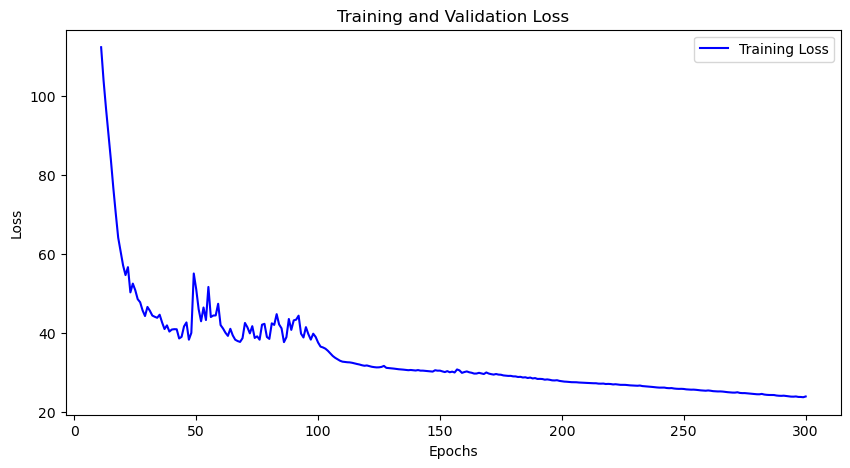

In [13]:
utils.plot_loss(history, val=False)

In [14]:
_, preds = model.predict()

1/1 [==============================] - 0s 18ms/step


In [15]:
np.sum(preds['2018']), np.sum(preds['2019'])

(323400.03, 312287.53)

In [16]:
dfreal['2018'].sum(), dfreal['2019'].sum()

(277418.07689424895, 372601.39782335004)

In [17]:
utils.real_eval(dfreal, preds)

(29.962229428222372, 41.5095819071023)